In [1]:
%%sh
apt-get -qq install tesseract-ocr cuneiform -y

Selecting previously unselected package cuneiform-common.
(Reading database ... 120831 files and directories currently installed.)
Preparing to unpack .../00-cuneiform-common_1.1.0+dfsg-9_all.deb ...
Unpacking cuneiform-common (1.1.0+dfsg-9) ...
Selecting previously unselected package libcuneiform0:amd64.
Preparing to unpack .../01-libcuneiform0_1.1.0+dfsg-9_amd64.deb ...
Unpacking libcuneiform0:amd64 (1.1.0+dfsg-9) ...
Selecting previously unselected package libwmflite-0.2-7:amd64.
Preparing to unpack .../02-libwmflite-0.2-7_0.2.12-5ubuntu1_amd64.deb ...
Unpacking libwmflite-0.2-7:amd64 (0.2.12-5ubuntu1) ...
Selecting previously unselected package libgraphicsmagick-q16-3.
Preparing to unpack .../03-libgraphicsmagick-q16-3_1.4+really1.3.38-1ubuntu0.1_amd64.deb ...
Unpacking libgraphicsmagick-q16-3 (1.4+really1.3.38-1ubuntu0.1) ...
Selecting previously unselected package libgraphicsmagick++-q16-12.
Preparing to unpack .../04-libgraphicsmagick++-q16-12_1.4+really1.3.38-1ubuntu0.1_amd64.d

In [2]:
! pip install transformers[torch] datasets torch pyocr pandas numpy nlpaug tqdm huggingface_hub pytesseract --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00


In [27]:
from PIL import Image
import requests
import pytesseract
import pyocr
import itertools

In [9]:
tools = pyocr.get_available_tools()

In [10]:
tools

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/tesseract.py'>,
 <module 'pyocr.libtesseract' from '/usr/local/lib/python3.10/dist-packages/pyocr/libtesseract/__init__.py'>,
 <module 'pyocr.cuneiform' from '/usr/local/lib/python3.10/dist-packages/pyocr/cuneiform.py'>]

In [11]:
image = Image.open("docs/phi_free_1_1.png")

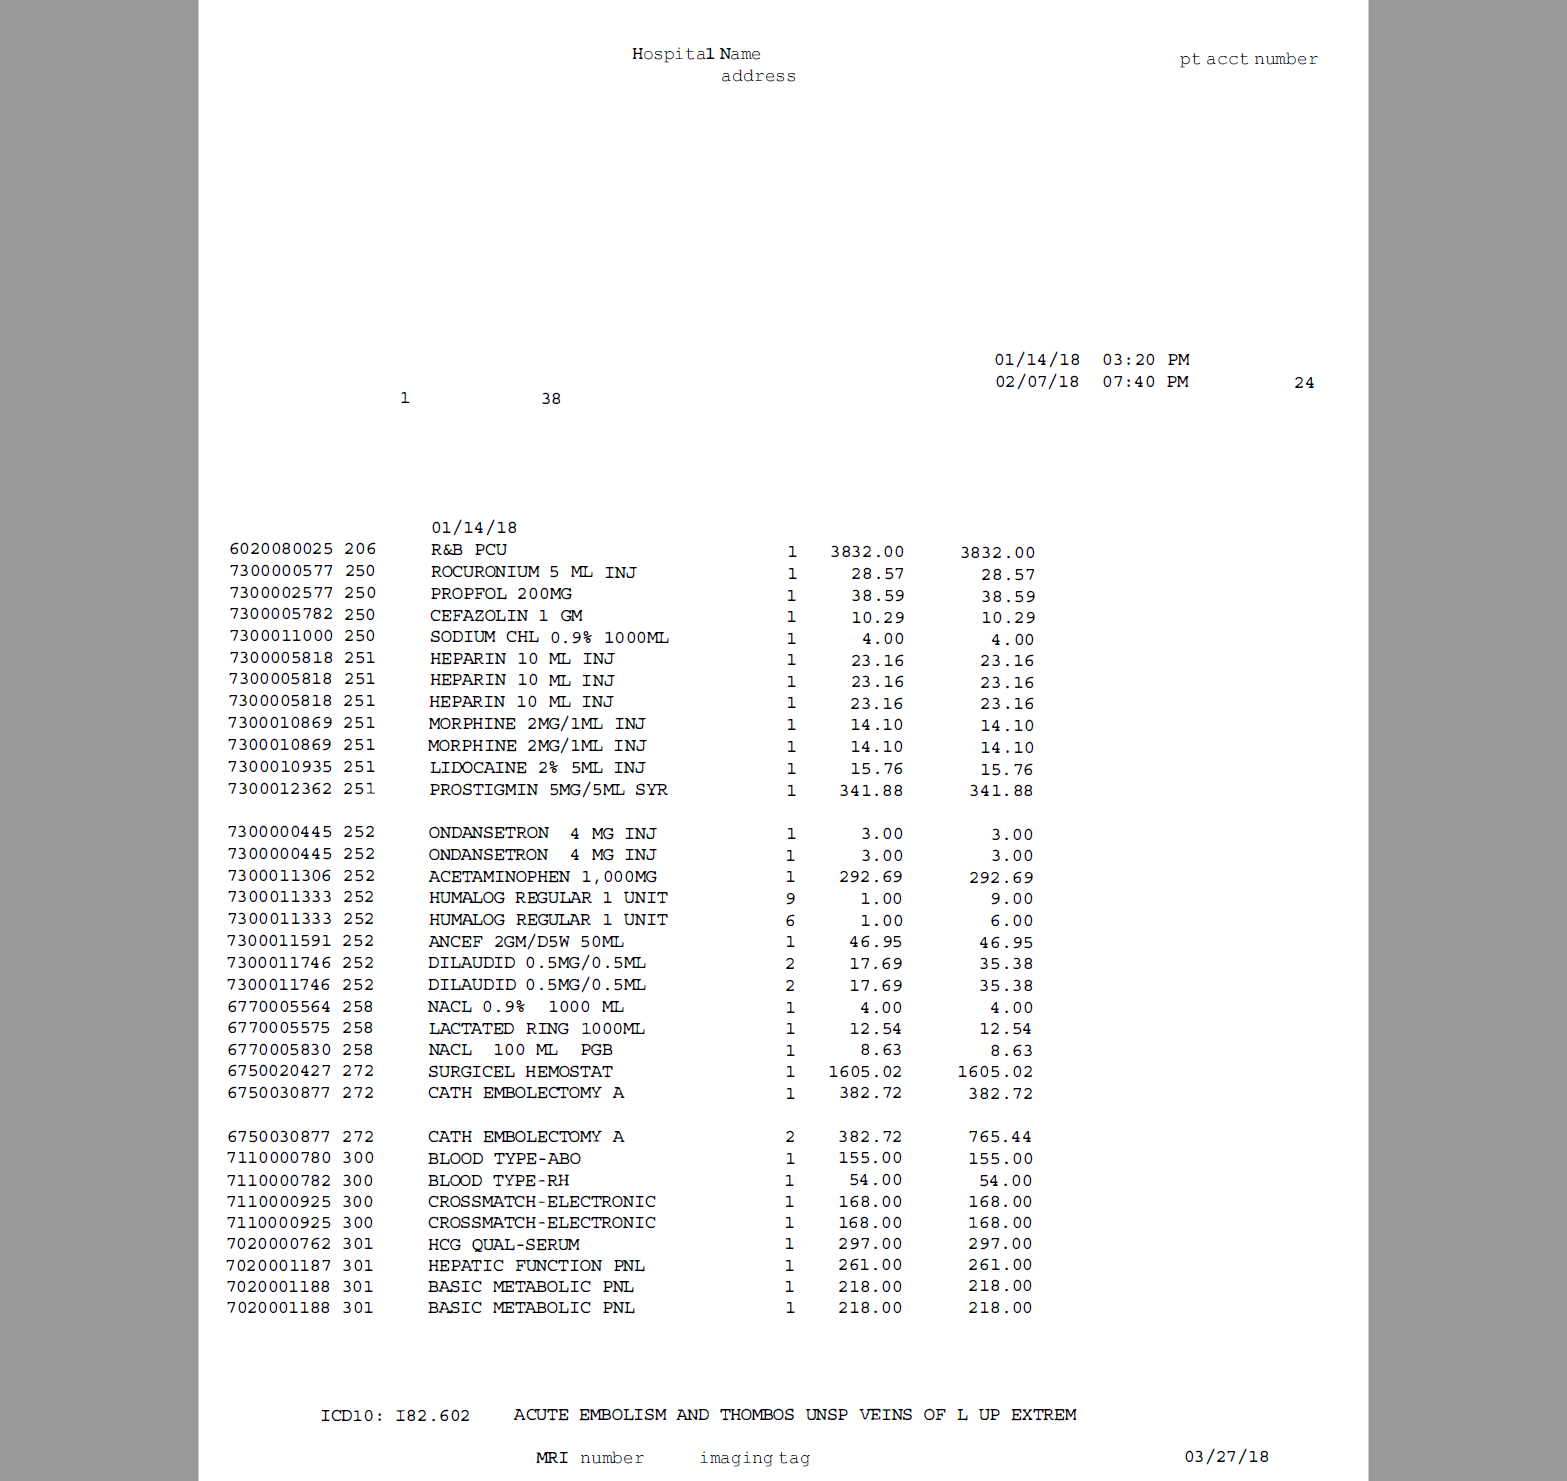

In [12]:
image

### Perform Text Extraction at the character level for each document

In [16]:
cuneiform_txt = tools[-1].image_to_string(
    image,
    lang="eng",
    builder=pyocr.builders.TextBuilder(cuneiform_singlecolumn=True)
)

cuneiform_txt.split("\n")

['Hv = I:IN: ',
 'Pt, . 7 ',
 '01/14/18 03 20 PM ',
 '02/07/18 07.40 PM 24 ',
 '38 ',
 '01/14/18 ',
 '6020080025 206 RSB PCJ I 3832.00 3832.00 ',
 '7300000577 250 RQCJRQNIUM 5 ML INJ I 28.57 28.57 ',
 '7300002577 250 PROPFOL 200MG I 38 59 38.59 ',
 '7300005782 250 CEFAZOLIN I GM 1 10 29 10.29 ',
 "7300011000 250 SODI'JM CHL 0.94 1000NL 1 4.00 4.00 ",
 '7300005818 251 HEPARIN 10 ML INJ I 23 16 23.16 ',
 '7300005818 251 HEPARIN 10 ML INJ I 23.16 23.16 ',
 '7300005818 251 HEPARIN 10 ML INJ I 23 16 23.16 ',
 '7300010869 251 MORPHINE 25G/IML INJ I 14.10 14.10 ',
 '7300010869 251 MORPHINE 25M/IML INJ 1 14.10 14.10 ',
 '7300010935 251 LIDOCAINE 24 5ML INJ I 15.76 15.76 ',
 "7300012362 25' PROSTIGMIN 5MG/5ML SYR 1 341.88 341.88 ",
 '7300000445 252 ONDANSETRON 4 IT INJ I 3.00 3.00 ',
 '7300000445 252 QNDANSETRON 4 FK INJ 1 3.00 3 00 ',
 '7100011306 252 ACETAMINOPHEN 1,000MG I 292.69 292.69 ',
 '7300011333 252 HJMALOG REGULAR I UNIT 9 1.00 9.00 ',
 '7100011333 252 HUMALOG REGJLAR 1 UNIT 6 1.00 6

In [21]:
tesseract_txt = tools[0].image_to_string(
    image,
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
tesseract_txt.split("\n")

['Hospital Name pt acct number',
 'address',
 '01/14/18 03:20 PM',
 '02/07/18 07:40 PM 24',
 '1 38',
 '01/14/18',
 '6020080025 206 R&B PCU 1 3832.00 3832.00',
 '7300000577 250 ROCURONIUM 5 ML INT 1 28.57 28.57',
 '7300002577 250 PROPFOL 200MG 1 38.59 38.59',
 '7300005782 250 CEFAZOLIN 1 GM 1 10.29 10.29',
 '7300011000 250 SODIUM CHL 0.9% 1000ML 1 4.00 4.00',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300005818 251 HEPARIN 10 ML INT 1 23.16 23.16',
 '7300010869 251 MORPHINE 2MG/1ML INT 1 14.10 14.10',
 '7300010869 251 MORPHINE 2MG/1ML INT 1 14.10 14.10',
 '7300010935 251 LIDOCAINE 2% 5ML INT 1 15.76 15.76',
 '7300012362 251 PROSTIGMIN 5MG/5ML SYR 1 341.88 341.88',
 '7300000445 252 ONDANSETRON 4 MG INU 1 3.00 3.00',
 '7300000445 252 ONDANSETRON 4 MG INT 1 3.00 3.00',
 '7300011306 252 ACETAMINOPHEN 1, 000MG 1 292.69 292.69',
 '7300011333 252 HUMALOG REGULAR 1 UNIT 9 1.00 9.00',
 '7300011333 252 HUMALOG REGULAR 1 UNIT 6 1.00 6.0

### Now look at each line item in order to generalize transformation logic implemented

In [33]:
token_builder = []
for line in tesseract_txt.split("\n"):
  token_builder.append(line.split(" "))
tesseract_tokens = list(itertools.chain(*token_builder))

token_builder = []
for line in cuneiform_txt.split("\n"):
  token_builder.append(line.split(" "))
cuneiform_tokens = list(itertools.chain(*token_builder))

In [39]:
import numpy as np
np.sort(tesseract_tokens)

array(['-', '-', '0.5MG/0.5ML', '0.5MG/0.5ML', '0.9%', '0.9%', '000MG',
       '01/14/18', '01/14/18', '02/07/18', '03/27/18', '03:20', '07:40',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1,', '1.00', '1.00', '10',
       '10', '10', '10.29', '10.29', '100', '1000', '1000ML', '1000ML',
       '12.54', '12.54', '14.10', '14.10', '14.10', '14.10', '15.76',
       '15.76', '155.00', '155.00', '1605.02', '1605.02', '168.00',
       '168.00', '168.00', '168.00', '17.69', '17.69', '182.602', '2',
       '2', '2', '2%', '200MG', '206', '218.00', '218.00', '218.00',
       '218.00', '23.16', '23.16', '23.16', '23.16', '23.16', '23.16',
       '24', '250', '250', '250', '250', '251', '251', '251', '251',
       '251', '251', '251', '252', '252', '252', '252', '252', '252',
       '252', '252', '258', '258', '258', '261.00', '261.00', '272',
       '272'